In [ ]:
# =============================================================================
# Lectura de un fichero
# =============================================================================
#Librería estructura de datos
import pandas as pd

datos = pd.read_csv("dataset_31_credit-g.csv", sep = ",")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [ ]:
# =============================================================================
# Análisis descriptivos preliminares (conociendo nuestros datos)
# =============================================================================
#Descriptiva de los datos
descriptives = datos.describe()


#Valores blancos
print(datos.isnull().sum())
print(pd.isnull(datos).sum())

#Datos únicos que contiene cada variable
#datos["id"].unique()
datos["checking_status"].unique()
datos["duration"].unique()
datos["credit_history"].unique()
datos["purpose"].unique()
datos["credit_amount"].unique()
datos["savings_status"].unique()
datos["installment_commitment"].unique()
datos["personal_status"].unique()
datos["other_parties"].unique()
datos["residence_since"].unique()
datos["property_magnitude"].unique()
datos["age"].unique()
datos["other_payment_plans"].unique()
datos["housing"].unique()
datos["existing_credits"].unique()
datos["job"].value_counts()
datos["num_dependents"].value_counts()
datos["own_telephone"].value_counts()
datos["foreign_worker"].value_counts()
datos["class"].unique()

#Contar cuántos valores únicos tiene cada variable
#datos["id"].value_counts()
datos["checking_status"].value_counts()
datos["duration"].value_counts()
datos["credit_history"].value_counts()
datos["purpose"].value_counts()
datos["credit_amount"].value_counts()
datos["savings_status"].value_counts()
datos["installment_commitment"].value_counts()
datos["personal_status"].value_counts()
datos["other_parties"].value_counts()
datos["residence_since"].value_counts()
datos["property_magnitude"].value_counts()
datos["age"].value_counts()
datos["other_payment_plans"].value_counts()
datos["housing"].value_counts()
datos["existing_credits"].value_counts()
datos["job"].value_counts()
datos["existing_credits"].value_counts()
datos["num_dependents"].value_counts()
datos["own_telephone"].value_counts()
datos["foreign_worker"].value_counts()
datos["class"].value_counts()


id                        0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64
id                        0
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age    

good    700
bad     300
Name: class, dtype: int64

# New Section

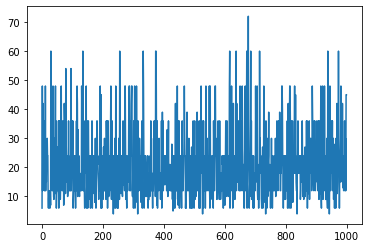

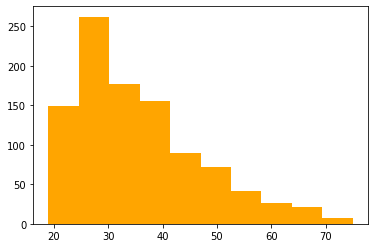

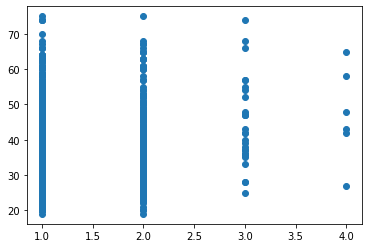

In [ ]:
# =============================================================================
# Gráficos descriptivos. Correlaciones
# =============================================================================
import matplotlib.pyplot as plt
# Gráfico de líneas
plt.plot(datos["duration"])
plt.show()
# Histogramas
plt.hist(datos["age"], facecolor = 'orange')
plt.show()
# Gráfico de dispersión
plt.scatter(datos["existing_credits"],datos["age"])
plt.show()

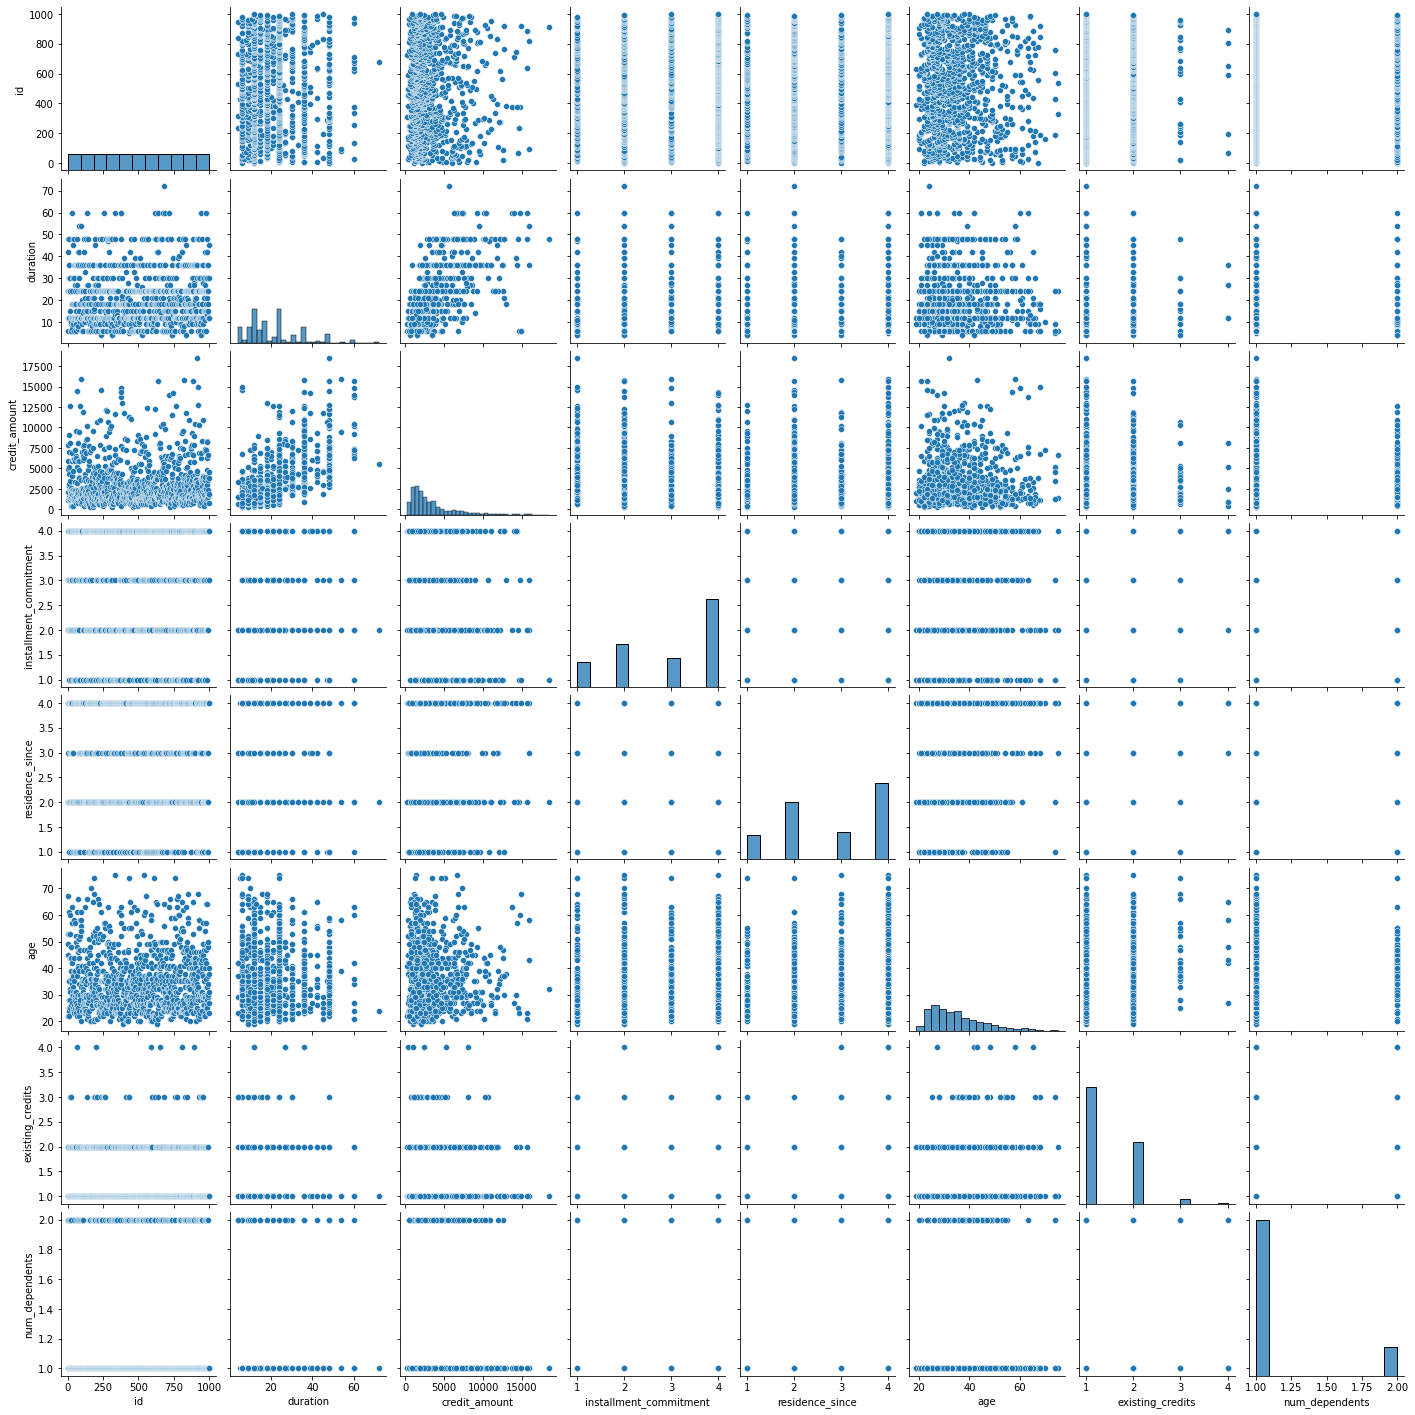

In [ ]:
import seaborn as sns
sns.pairplot(datos.select_dtypes(exclude=[object]))

In [ ]:
import plotly.express as px

df = px.data.iris()

fig = px.box(df, x="sepal_width", y="sepal_length")

fig.show()

In [ ]:
import plotly
from plotly.offline import plot
import plotly.graph_objs as go

plotly.offline.plot({
"data": [
    go.Scatter(    x=[1, 2, 3, 4],
    y=[10, 11, 12, 13], mode='markers',
    marker=dict(
        size=[40, 60, 80, 100]))],
"layout": go.Layout(showlegend=False,
    height=600,
    width=600,
)
})


'temp-plot.html'

In [ ]:
fig = go.Figure(data=[{'type': 'scatter', 'y': [2, 1, 4]}])

plot(fig)

'temp-plot.html'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ac2aa5990>,
      dtype=object)

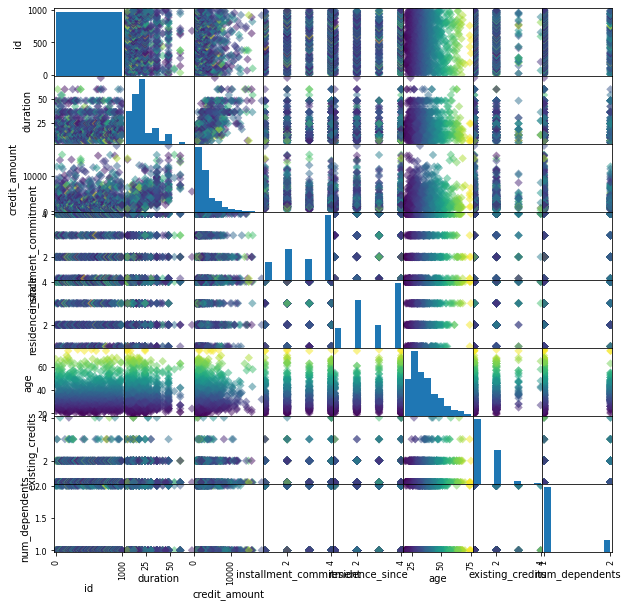

In [ ]:
# =============================================================================
# Preprocesamiento
# =============================================================================
#Borrar atributos (variables) que no sean numéricos
#1º opción. Seleccionar solo las variables numéricas y añadir variable objetivo
num_datos = datos.select_dtypes(exclude=[object])
num_datos.loc[:, "age"] = datos["age"]

#2º opción. Borrar columnas
#num_datos = datos.drop(["id", "credit_history", "purpose", "credit_amount", "savings_status", "personal_status", "other_parties", "residence_since", "property_magnitude"],
#                       axis = 1) #filas 0


#Reemplazar los valores
#num_datos["checking_status"][83] = 10

#Borrar registros nulos (o vacíos)
num_datos = num_datos.dropna()

#Convertir var. obj. en numérico
#num_datos["age"].unique()

#num_datos.loc[num_datos.loc[:, "age"] == "+", "age"] = 1 #Selección de la Class == '+'
#num_datos.loc[num_datos.loc[:, "age"] == "-", "age"] = 0 #Selección de la Class == '-'


num_datos["age"].unique()

pd.plotting.scatter_matrix(num_datos,
                               c = num_datos['age'], # color
                               figsize = [10, 10], # tamaño de la ventana
                               s=35, #tamaño del marcador
                               marker = 'D') # tipo de marcar los puntos


Index(['id', 'duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

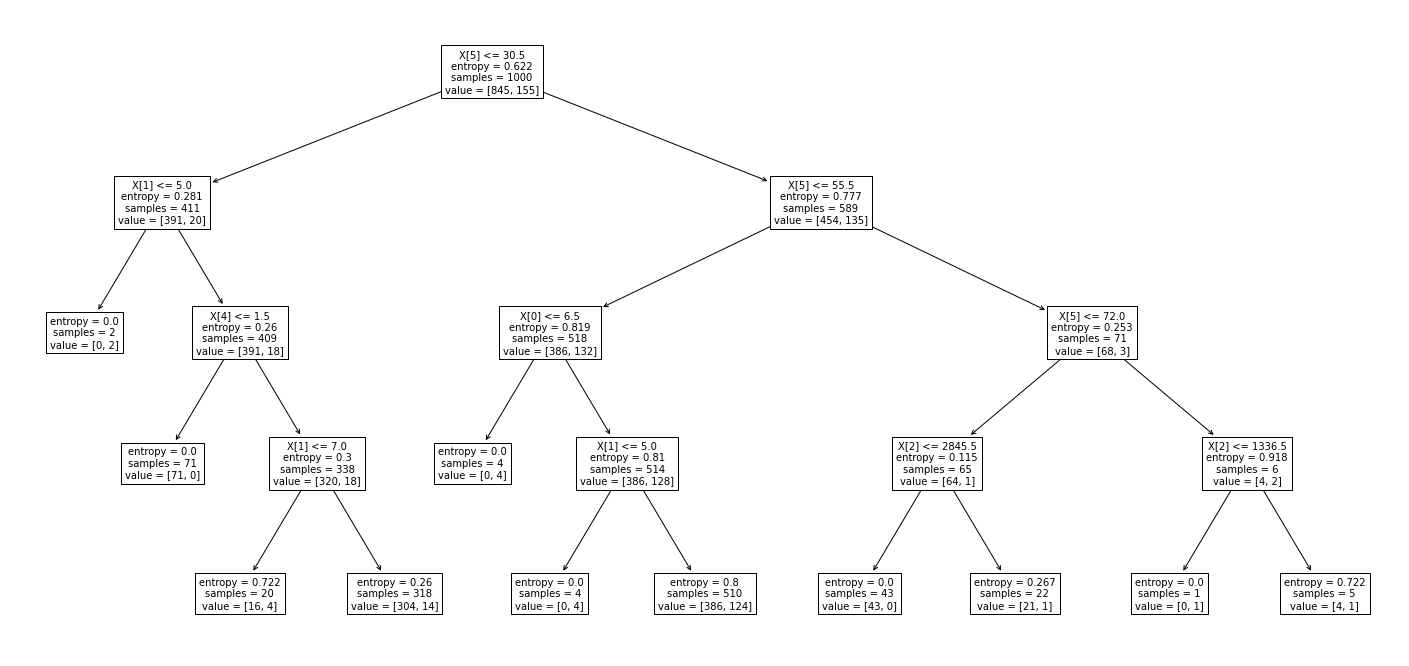

In [ ]:
# =============================================================================
# Métodos supervisados. Decission Trees - Sklearn. CLASIFICACIÓN
# =============================================================================
# Importando el árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

#Selección de las variables
X = num_datos.values[:, :-1] #Variables explicativas
y = num_datos.values[:, -1] #variable objetivo
y = y.astype("int")

# Creando el modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Ajustando el modelo
model = model.fit(X, y)

#Dibujar el árbol entrenado
fig, ax = plt.subplots(figsize=(25, 12)) #Tamaño del gráfico
tree.plot_tree(model, fontsize = 10)


num_datos.columns

Mean Absolute Error: 0.2504406642633162
Mean Squared Error: 0.14222157733374274
Root Mean Squared Error: 0.37712276162244934


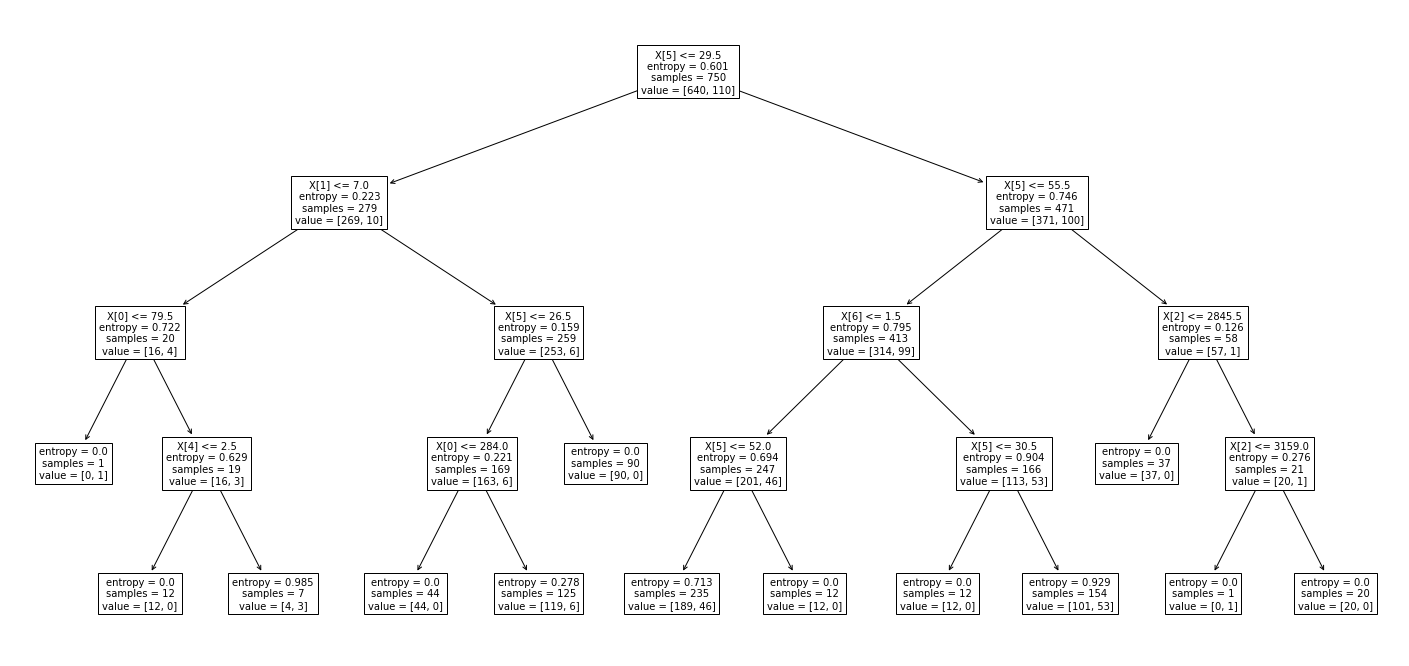

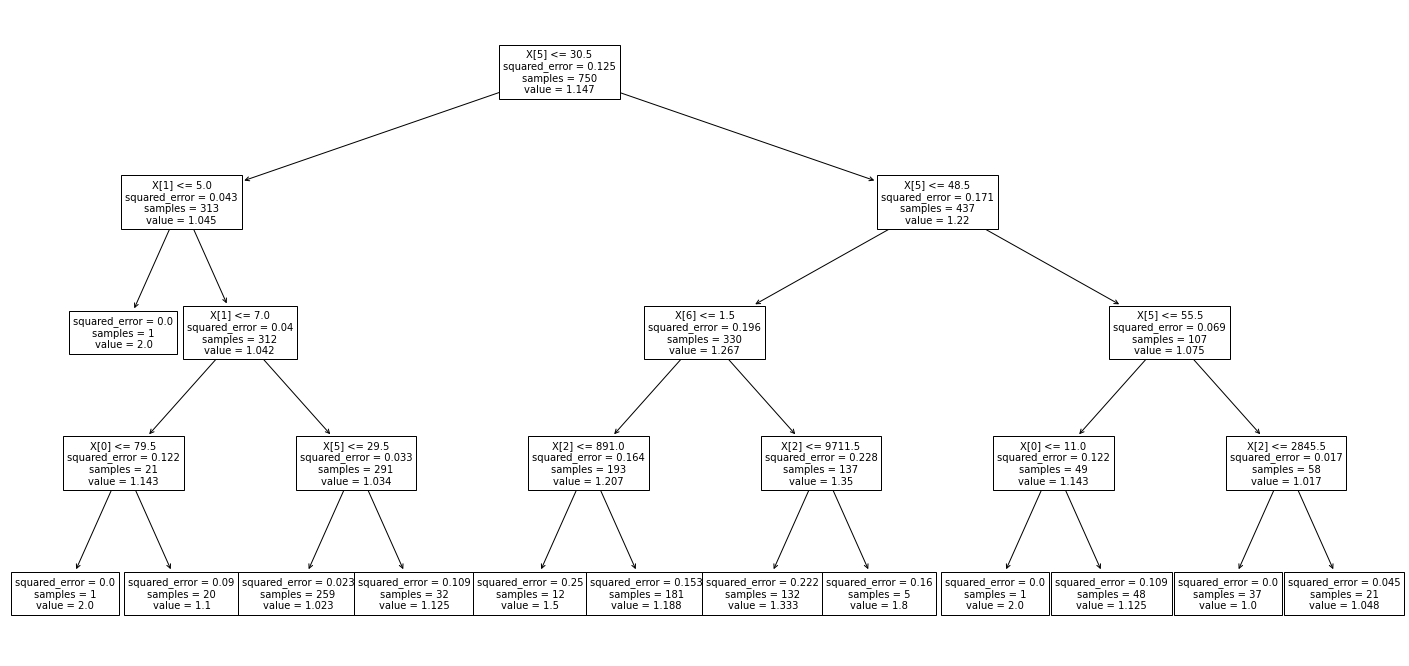

In [ ]:
# =============================================================================
# Métodos supervisados. Decission Trees - Sklearn. PREDICCIÓN
# =============================================================================
from sklearn.model_selection import train_test_split #Separar el data set en training y test
from sklearn.metrics import accuracy_score #Métricas de la predicción del modelo. Precisión
from sklearn.metrics import confusion_matrix #Métricas de la predicción del modelo. Matriz de confusión

#Selección de las variables
X = num_datos.values[:, :-1] #Variables explicativas
y = num_datos.values[:, -1] #variable objetivo
y = y.astype("int")

#Data sets de training y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Crear el modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Ajustando el modelo con el data set de training
model = model.fit(X_train, y_train)

#Prediciendo sobre el data set de test
y_predict = model.predict(X_test)

#Métrica de precisión en la predicción
accuracy_score(y_test, y_predict)

#Matriz de confusión
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted 0', 'Predicted 1'],
    index=['True Not Class', 'True Class']
)

#Dibujar el árbol entrenado
fig, ax = plt.subplots(figsize=(25, 12)) #Tamaño del gráfico
tree.plot_tree(model, fontsize = 10)


num_datos.columns
# =============================================================================
# Métodos supervisados. Decission Trees - Sklearn. Regresión
# =============================================================================
from sklearn.tree import DecisionTreeRegressor


#Selección de las variables
X = num_datos.values[:, :-1] #Variables explicativas
y = num_datos.values[:, -1] #variable objetivo
y = y.astype("int")

#Data sets de training y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#Crear el modelo
model = DecisionTreeRegressor(max_depth=4)

# Ajustando el modelo con el data set de training
model = model.fit(X_train, y_train)

#Prediciendo sobre el data set de test
y_predict = model.predict(X_test)





#Dibujar el árbol entrenado
fig, ax = plt.subplots(figsize=(25, 12)) #Tamaño del gráfico
tree.plot_tree(model, fontsize = 10)


import numpy as np
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

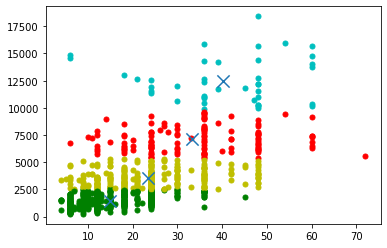

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# =============================================================================
# Métodos NO supervisados. Clústering - KMeans, Sklearn
# =============================================================================

from sklearn.cluster import KMeans

#Seleccionar los atributos "credit_amount" y "installment_commitment"
K_datos = num_datos[["duration", "credit_amount", "installment_commitment", "residence_since"]]

#Crear modelo
kmeans = KMeans(n_clusters = 4)

#Ajustar modelo
kmeans.fit(K_datos)

#Dibujar el clústering
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#Dibujar los puntos con los colores de cada clúster
colors = ["g.","r.","c.","y."]
for i in range(len(K_datos)):
    plt.plot(K_datos.iloc[i,0], K_datos.iloc[i,1], colors[labels[i]], markersize = 10)

#Dibujar los centroides de cada clúster
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()



K_datos["cluster"] = labels


summary0 = K_datos[K_datos.cluster == 0].describe()
summary1 = K_datos[K_datos.cluster == 1].describe()
summary2 = K_datos[K_datos.cluster == 2].describe()
summary3 = K_datos[K_datos.cluster == 3].describe()



In [ ]:
####### Reglas de asociación

!pip install apyori

import numpy as np
import pandas as pd

datos = datos[["personal_status", "employment", "foreign_worker", "class"]]

# Intializing the list
transacts = []
# populating a list of transactions
for i in range(0, 500):
  transacts.append([str(datos.values[i,j]) for j in range(0, 3)]) # la ultima columna 3

from apyori import apriori
rule = apriori(transactions = transacts, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)



output = list(rule) # returns a non-tabular output
# putting output into a pandas dataframe
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))
output_DataFrame = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
